Termpaper for candidates: 4, 44, 39

**TASK 1**

In [988]:
#Importing two external libraries
import pandas as pd
import glob

#Creating a datapath to access all the files in the price folder
DATA_PATH = 'data/DayAheadPrices_12.1.D/*.csv'

#Defining all the relevant files using glob.glob
# Creating one large dataframe with all the prices across Europe, making sure to seperate the values with '\t' 
# ignoring index to make sure that the dataframe has new unique indexes
files = glob.glob(DATA_PATH)
df_price_all = pd.concat([pd.read_csv(file, sep='\t') for file in files], ignore_index=True)

In [989]:
#Converting the strings in the DateTime column to the datetime format and setting the DateTime column to be the index
df_price_all['DateTime'] = pd.to_datetime(df_price_all['DateTime'])

df_price_all = df_price_all.set_index('DateTime')

In [990]:
#Sorting the dataframe in chronoligial order
df_price_all = df_price_all.sort_index()

In [991]:
#Creating two dataframes containing only the norwegian and german prices, making sure to only use the german hourly values
#(you can check the length of the dataframes to be equal to 43824, 24hours*365days*5years + 24 hours (feb 29th 2020) )
df_price_NO = df_price_all[df_price_all['AreaCode'].str.contains('NO-2', na=False)]

df_price_DE = df_price_all[df_price_all['MapCode'].str.contains('DE_LU', na=False)]
df_price_DE = df_price_DE[df_price_DE['ResolutionCode'].str.contains('60', na=False)]

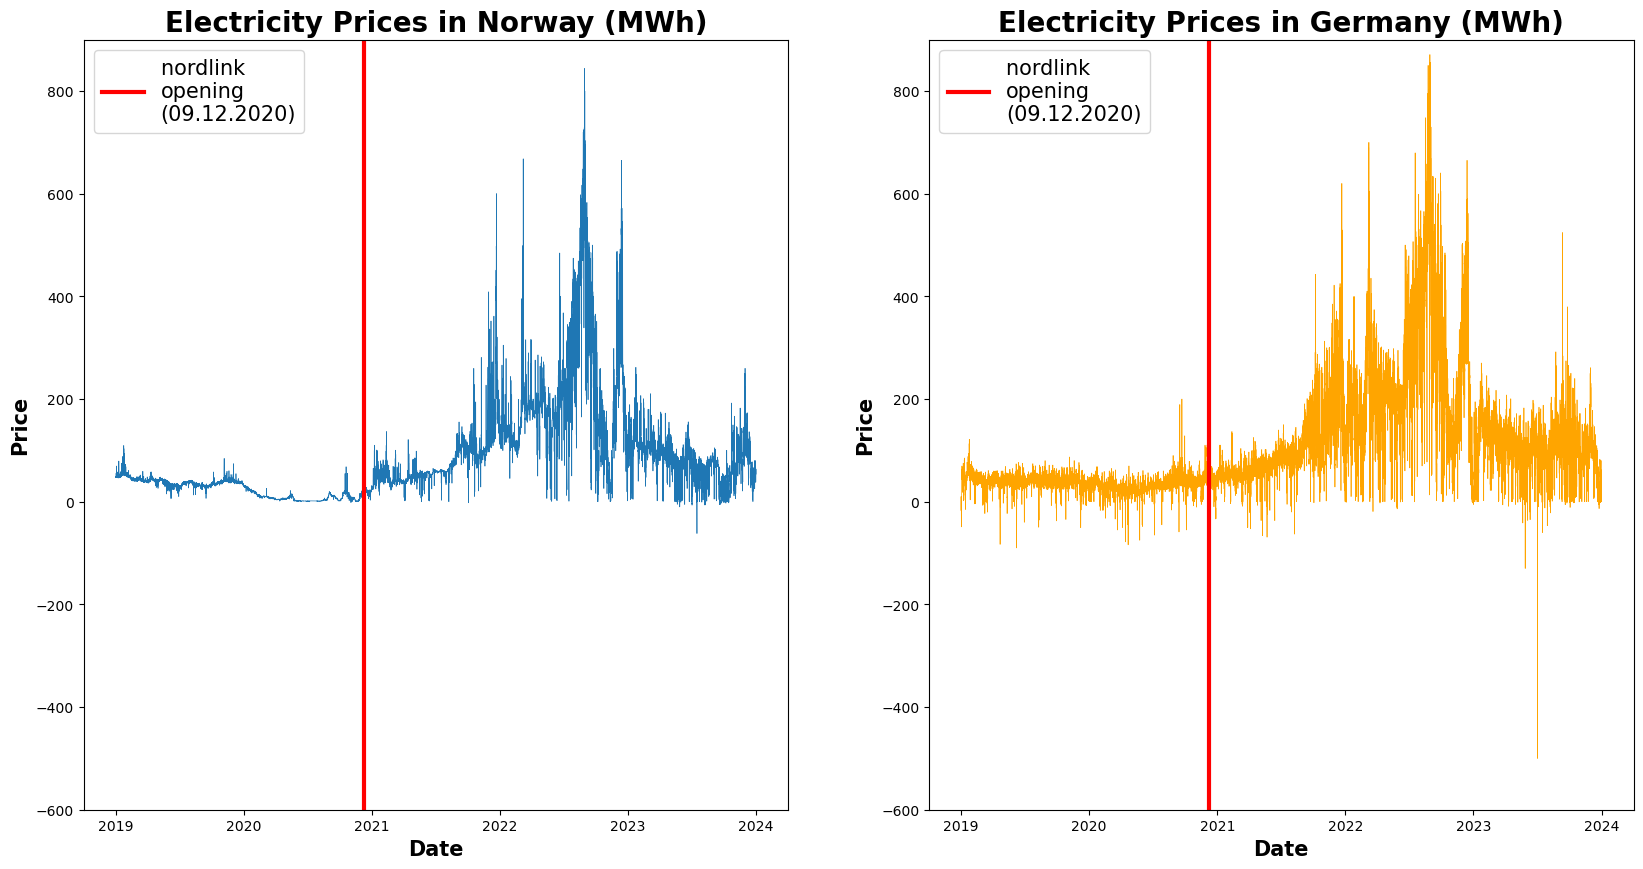

In [992]:
#Importing matplotlib to visualize the data
import matplotlib.pyplot as plt

#defining a new figure with two graphs, with a size of 20x10
fig, ax = plt.subplots(1,2, figsize=(20,10))

#Defining the data and style of graph number 1 (Norway)
ax[0].plot( df_price_NO['Price'], linestyle = '-', linewidth = 0.5)
ax[0].set_title('Electricity Prices in Norway (MWh)', fontsize = 20, fontweight = 'bold') 
ax[0].set_xlabel('Date', fontsize = 15, fontweight = 'bold') 
ax[0].set_ylabel('Price', fontsize = 15, fontweight = 'bold')

#Defining the data and style of graph number 1 (Germany)
ax[1].plot(df_price_DE['Price'], linestyle = '-', linewidth = 0.5, color = 'orange')
ax[1].set_title('Electricity Prices in Germany (MWh)', fontsize = 20, fontweight = 'bold') 
ax[1].set_xlabel('Date', fontsize = 15, fontweight = 'bold') 
ax[1].set_ylabel('Price', fontsize = 15, fontweight = 'bold')

#Making sure that the graphs have the same range, so they are easier to compare visually
ax[0].set_ylim([-600,900])
ax[1].set_ylim([-600,900])

#Defining a variable to the date of NorLinks opening
nordlink_opening_date = pd.to_datetime('2020-12-09')

#Puting a line on the x axis equal to the opening date, styling it, and giving it an explenation in both graphs
ax[0].axvline(nordlink_opening_date, color = 'red',linestyle= '-', linewidth=3, label= 'nordlink \nopening\n(09.12.2020)')
ax[0].legend(fontsize = 15)

ax[1].axvline(nordlink_opening_date, color = 'red',linestyle= '-', linewidth=3, label= 'nordlink \nopening\n(09.12.2020)')
ax[1].legend(fontsize = 15)

#Showing the figure
plt.show()

**CONCLUSION OF TASK 1:**

It seems both graphs are correlated to a significant extent, both before and after the opening of Norlink. 

The norwegian graoh does however seem to be less volatile than the German one before the opening. They follow similar patterns, but the Norwegian peaks and bottoms are less extreme. After the opening, they seem to have more similar volatility.

Electricity prices are also very high for some periods after the opening, through the middle of 2021 and until the end of 2022. If this is because of Nordlink, or because of external factors is hard to say, but it is possible. The correlation is still strong. 

When it comes to negative electricity prices, this is explained by fact that demand can be lower than supply. When power is supplied to an electricity grid, the power needs to 'go somewhere', and if no one wants to take it, prices drop below 0. We see the extreme dip in the middle of 2023 in Germany, is in the middle of summer, and in such a time, demand might be especially low, thus creating extreme negative prices.

**TASK 2**

In [993]:
#Defining five different DataFrames for each of the years 2019-2023, where the only column is the price
#Used a for-loop to effectivize the code, but it decreased readability, and might not be ideal
for i in range(5):
    globals()[f'NO_price_20{i+19}'] = df_price_NO[df_price_NO.index.year == int(f'20{i+19}')]['Price']

for i in range(5):
    globals()[f'DE_price_20{i+19}'] = df_price_DE[df_price_DE.index.year == int(f'20{i+19}')]['Price']

#Defined five new DataFrames that only contain the mean, median, std, min and max values of each year
#Didn´t manage to use loops for this task, but when we are only modifying 10 dataframes, it is not too cumbersome manually
NO_summary_2019 = NO_price_2019.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2020 = NO_price_2020.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2021 = NO_price_2021.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2022 = NO_price_2022.agg(['mean', 'median', 'std' , 'min' , 'max'])
NO_summary_2023 = NO_price_2023.agg(['mean', 'median', 'std' , 'min' , 'max'])

DE_summary_2019 = DE_price_2019.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2020 = DE_price_2020.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2021 = DE_price_2021.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2022 = DE_price_2022.agg(['mean', 'median', 'std' , 'min' , 'max'])
DE_summary_2023 = DE_price_2023.agg(['mean', 'median', 'std' , 'min' , 'max'])

#Creating list of years to use for the DataFrames
yearlist = [2019, 2020, 2021, 2022, 2023]

#Creating a new dataframes of all the years and assigning year labels to each column
NO_summary_all = pd.concat([NO_summary_2019, NO_summary_2020, NO_summary_2021, NO_summary_2022, NO_summary_2023], axis = 1)
NO_summary_all.columns = yearlist
NO_summary_all = NO_summary_all.round(2)

DE_summary_all = pd.concat([DE_summary_2019, DE_summary_2020, DE_summary_2021, DE_summary_2022, DE_summary_2023], axis = 1)
DE_summary_all.columns = yearlist
DE_summary_all = DE_summary_all.round(2)

#Combining the two DataFrames and assigning each column to a year and country using 'yearlist'
NO_summary_all.columns = pd.MultiIndex.from_product([['Norway'], NO_summary_all.columns])
DE_summary_all.columns = pd.MultiIndex.from_product([['Germany'], DE_summary_all.columns])

summary_all = pd.concat([NO_summary_all, DE_summary_all], axis = 1)
summary_all
#To get the DataFrame into Excel, one simply copies it

Norway                                Germany                          \
          2019   2020    2021    2022    2023    2019    2020    2021    2022   
mean     39.26   9.29   75.11  211.28   79.44   37.67   30.47   96.85  235.44   
median   38.81   6.95   59.34  181.13   80.46   38.06   30.99   75.48  208.34   
std       8.23   8.26   47.22  125.85   36.28   15.52   17.50   73.68  142.82   
min       5.86  -1.73   -1.97    0.04  -61.84  -90.01  -83.94  -69.00  -19.04   
max     109.45  99.92  600.16  844.00  261.85  121.46  200.04  620.00  871.00   

                
          2023  
mean     95.18  
median   98.02  
std      47.58  
min    -500.00  
max     524.27

**CONCLUSION TASK 2:** 

As with task number 1, we see that the minimum and maximum prices in Norway are less extreme in 2019 and 2020. We can see this on the minimum and maximum prices for each country in 2020 and 2019, but it is best expressed in the value std(standard deviation). This value is half as big in Norway in 2019 and 2020 compared to Germany, but in the following years standard deviation was more similar in the two countries.

This indicates that the Norwegian energy market has been affected, and has become more volatile after connecting with the German market.

Again, it might be relevant to concider external factors, but the corrrelation seems solid.

**TASK 3**

In [994]:
#Creating a new data path for the other data set
DATA_PATH_flow = 'data/PhysicalFlows_12.1.G/*.csv'

files_flow = glob.glob(DATA_PATH_flow)

#Combining all the files in the data set to create one data frame
df_flow_all= pd.concat([pd.read_csv(file, sep='\t') for file in files_flow], ignore_index=True)

In [995]:
#Converting the dates in 'DateTime' to a type thats readable
df_flow_all['DateTime'] = pd.to_datetime(df_flow_all['DateTime'])

#Sets the 'DateTime' as the index
df_flow_all = df_flow_all.set_index('DateTime')

In [996]:
#Sorts the index after date, to make sure that it is in the correct order
df_flow_all = df_flow_all.sort_index()

In [997]:
#Create a data frame for the data of the imports from Germany to Norway
imports_to_Norway = df_flow_all[(df_flow_all['OutMapCode'] == 'NO2') & (df_flow_all['InMapCode'] == 'DE_LU')]

In [998]:
#Repeating the previous step, but for Norway to Germany
exports_from_Norway = df_flow_all[(df_flow_all['InMapCode'] == 'NO2') & (df_flow_all['OutMapCode'] == 'DE_LU')]

In [999]:
#To avoid changes to the original data, we created copies of the data frames
imports_to_Norway = imports_to_Norway.copy()
exports_from_Norway = exports_from_Norway.copy()

imports_to_Norway['Type'] = 'Import'
exports_from_Norway['Type'] = 'Export'

In [1000]:
#Extracts the years from the date, and adds it to a new column
imports_to_Norway['Year'] = pd.to_datetime(imports_to_Norway.index).year
exports_from_Norway['Year'] = pd.to_datetime(exports_from_Norway.index).year

In [1001]:
#Groups the data by the type (either 'Export' or 'Import'), and by year. 
#Then uses sum() to find the total sum by these groups. 
annual_imports = imports_to_Norway.groupby(['Year', 'Type'])['FlowValue'].sum()
annual_exports = exports_from_Norway.groupby(['Year', 'Type'])['FlowValue'].sum()

In [1002]:
#Combines the two data frames into one. 
#Unstack reshapes the data frame, so that 'Import' and 'Export' becomes two different columns
#and 'Year'becomes the index
combined_data = pd.concat([annual_imports, annual_exports]).unstack()

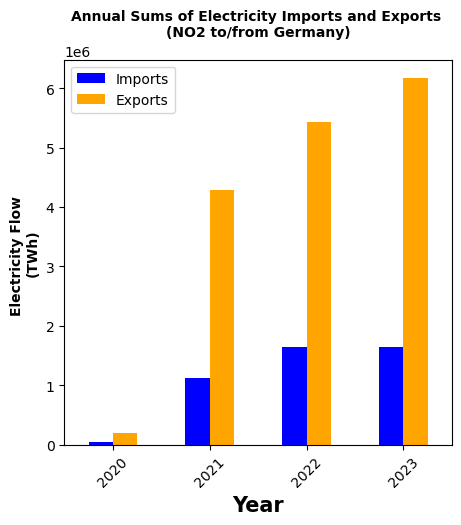

In [1003]:
#Creating the figure and defining the size of it
fig, ax = plt.subplots(figsize=(5, 5))
combined_data.plot(kind='bar', ax=ax, color = ['blue', 'orange'])

#Setting the x-label as 'Year'
ax.set_xlabel("Year", fontsize = 15, fontweight = 'bold')
#Setting the y-label as 'Electricity Flow'
ax.set_ylabel("Electricity Flow \n(TWh)", fontsize = 10, fontweight = 'bold')
#Setting the title of the figure
ax.set_title("Annual Sums of Electricity Imports and Exports \n(NO2 to/from Germany)", fontsize = 10, fontweight = 'bold')
#Creating a legend to make the code more readable
ax.legend(["Imports", "Exports"])
#
plt.xticks(rotation=45)

plt.show()

**CONCLUSION TASK 3:** 

Norway imports more electricity from Germany than it exports. 

The export level has increased across all of the years since opening. The level of import did increase between 2020 and 2021, but it has stayed still since. 

**TASK 4**

In [1004]:
#reseting dataframe for ease of use
df_flow_all = df_flow_all.reset_index()

# filtering the dataframe to only include imports from Germany to Norway
imports = df_flow_all[(df_flow_all['InMapCode'] == 'NO2') & (df_flow_all['OutMapCode'] == 'DE_LU')]

# filtering the dataframe to only include exports from Norway to Germany
exports = df_flow_all[(df_flow_all['InMapCode'] == 'DE_LU') & (df_flow_all['OutMapCode'] == 'NO2')]

In [1005]:
# setting indexes of imports and exports to DateTime
exports.set_index('DateTime', inplace=True)

imports.set_index('DateTime', inplace=True)

In [1006]:
#converting both dataframes to the sum export/import for each week
imports_W = imports.groupby(pd.Grouper( freq='W')).sum()
exports_W = exports.groupby(pd.Grouper( freq='W')).sum()

In [1007]:
#defining the dataframes to only include relevant information (FlowValues)
imports_W = imports_W['FlowValue']
exports_W = exports_W['FlowValue']

In [1008]:
# merging the two dataframes, and giving the export/import values their own respective column names
merged_df = pd.merge(exports_W, imports_W, on = ['DateTime'], suffixes = ('Export', 'Import'))

# removing NaNs
merged_df.fillna(0, inplace= True) 

# creating new NetFlow column that expresses the difference between exports and imports
merged_df['NetFlow'] = merged_df['FlowValueExport'] - merged_df['FlowValueImport']

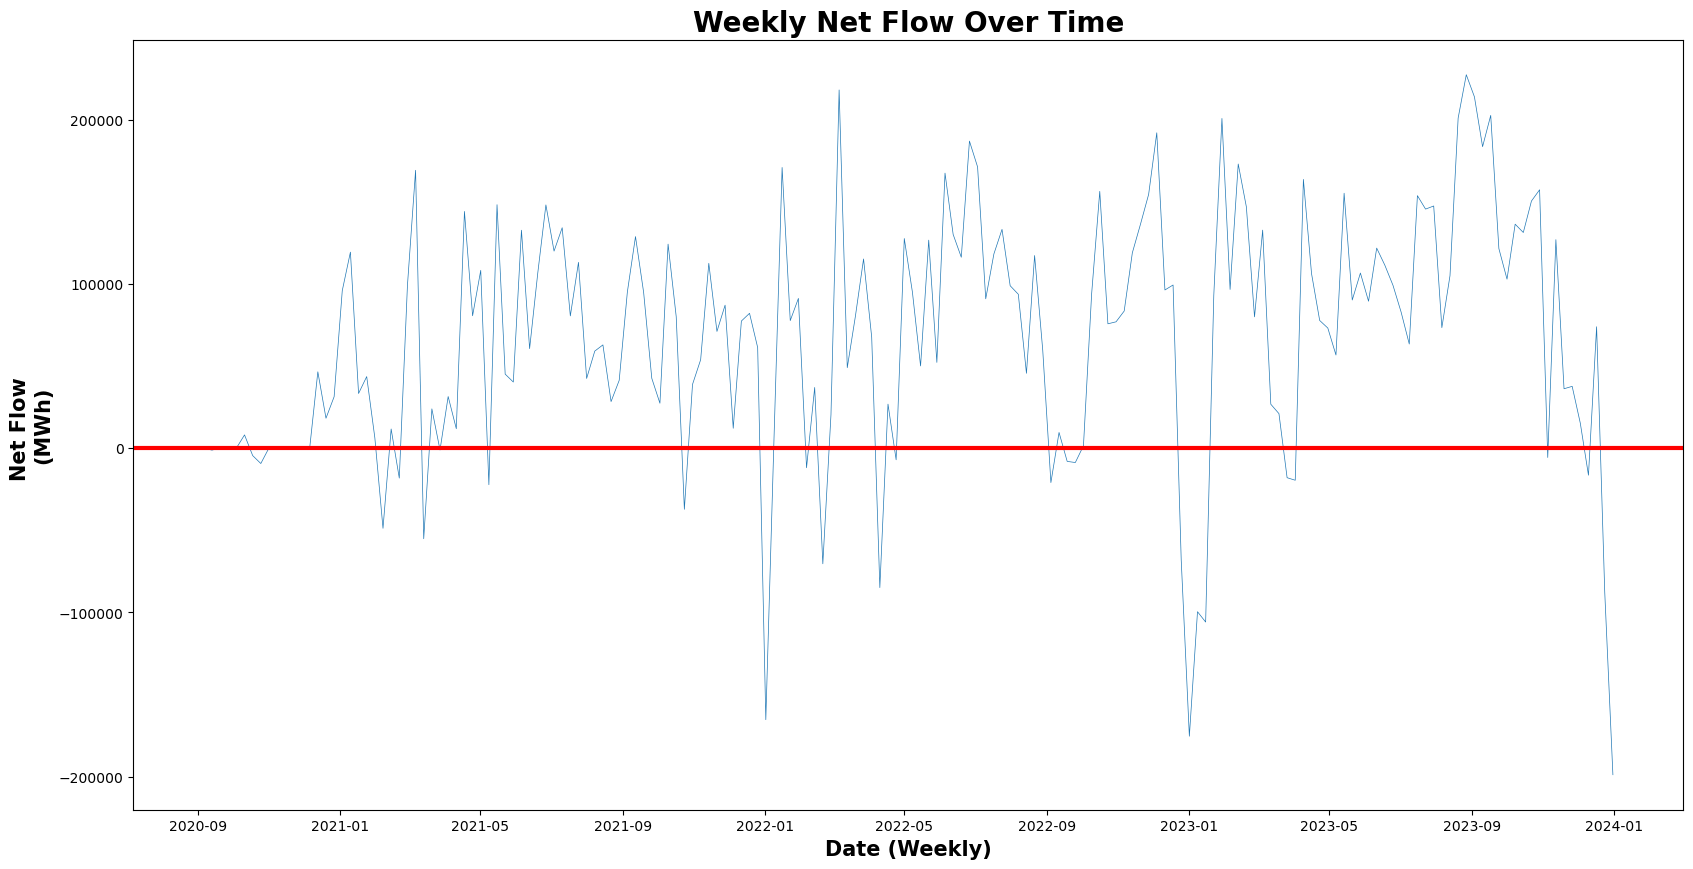

In [1009]:
# plotting the graph and adding labels
plt.figure(figsize = (20,10))

plt.plot(merged_df['NetFlow'], linestyle = '-', linewidth = 0.5)

plt.title('Weekly Net Flow Over Time', fontsize = 20, fontweight = 'bold')
plt.xlabel('Date (Weekly)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Net Flow \n(MWh)', fontsize = 15, fontweight = 'bold')
plt.axhline(color = 'red', linewidth = 3)
plt.show()

**CONCLUSION TASK 4:** 

The graph shows that Norway is a net exporter of electricity for the  majority of time since 2020. However, it also indicates that at certain times of the year Norway imported more electricity than it exported (indicated by the negative spikes). 

The pattern shows that Norway tends to import more electricity during late autumn, winter and early spring. A possibe explanation for this pattern is that during the winter, rivers tend to slow down or stop flowing. Therefore, Norways hydropower wont produce like it would normally. It is also fair to assume that the demand for energy is higher during colder parts of the year.

**TASK 5**

In [1010]:
# Creating new dataframe that contains one column of the price difference between Germany and Norway
delta_price = df_price_DE['Price'] - df_price_NO['Price']

#Creating another dataframe that expresses the price difference per week
#Note that we use '.mean()' instad of  '.sum()' because we are not interested in the total price. That would not make sense
delta_price_W = delta_price.groupby(pd.Grouper( freq='W')).mean() 

#Limiting the dataframe to relevant dates (after the opening of NordLink)
#If this is not done, the correlation value might be lower than it should
delta_price_W = delta_price_W[delta_price_W.index > nordlink_opening_date]

In [1011]:
# Modifying the merged flow dataframe to only contain the net flow
merged_df = merged_df['NetFlow']

#Limiting the data to after the opening of NordLink
merged_df = merged_df[merged_df.index > nordlink_opening_date]

In [1012]:
#Combine the two data frames into one, and drop all the missing values (just in case there are any)
combined_data = pd.DataFrame({'WeeklyPriceDifference': delta_price_W, 'WeeklyNetFlow': merged_df }).dropna()

In [1013]:
#Importing pearsonr function
from scipy.stats import pearsonr

In [1014]:
#Use 'pearsonr' to find the correlation between the weekly price difference and the weekly net flow
correlation, _ = pearsonr(combined_data['WeeklyPriceDifference'], combined_data['WeeklyNetFlow'])


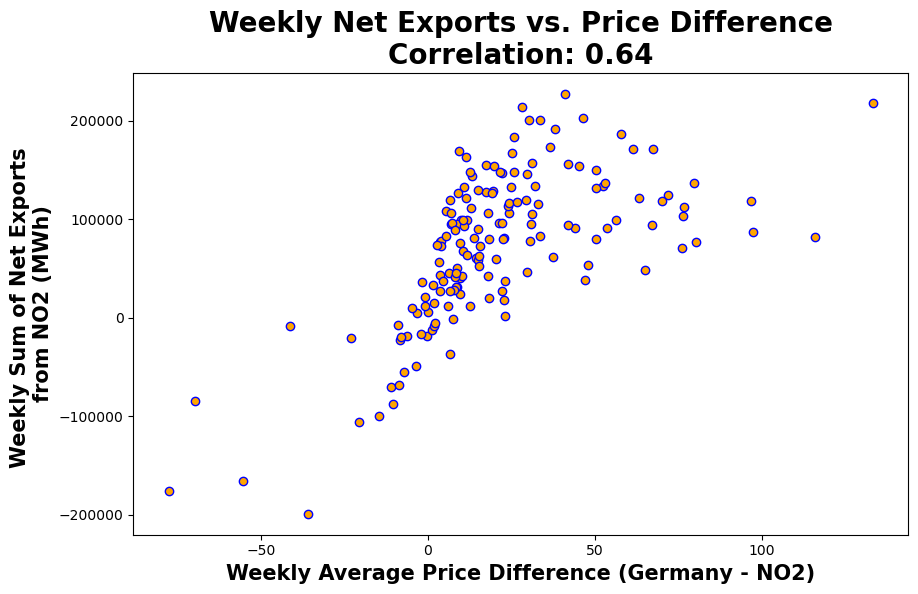

In [1015]:
#Plot the figure, showing the weekly sum of net exports in NO2 on the y-axis
#And the weekly average price difference between Germany and NO2 on the x-axis
#Formatting to match the rest of the figures
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['WeeklyPriceDifference'], combined_data['WeeklyNetFlow'], alpha=1, edgecolors='blue', color = 'orange')
plt.xlabel('Weekly Average Price Difference (Germany - NO2)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Weekly Sum of Net Exports \nfrom NO2 (MWh)', fontsize = 15, fontweight = 'bold')

#Adding the correlation title along with the correlation from the previous code section
plt.title(f"Weekly Net Exports vs. Price Difference\nCorrelation: {correlation:.2f}", fontsize = 20, fontweight = 'bold')

plt.show()

**TASK 5 CONCLUSION** 

The corrlation value shows that there is a medium to strong correlation (0.64) between the weekly average price and weekly sum of net exports. 

The scatter plot indicates that when the prices for NO2 are greater than those in Germany (causing a larger positive price difference), exports from Norway to Germany tend is to increase. 

During the few weeks, where prices in Norway was higher than Germany, it seems like Norway imports more electricity. It is worth noting that this correlation is harder to make, as the sample size is smaller.

**TASK 6**

To solve this task, we used different online sources. 

Mostly we used generative AI, in our case ChatGPT and CoPilot. Both are great tools for dissecting the tasks, for coming up with ideas for codes and for giving feedback to error messages. 

We did not, however use AI to create code from scratch. Rather, we used it to find ways of solving actions that we wanted to perform. We outlined the way from the task to the awnser and, used AI to help us in each step. It was also very important to us to understand each step, and why the code worked as it did. 
In many cases AI did not provide efficient solutions, and we simplified them for readability and program efficiency. 
AI could also give us useful feedback on error messages

In some cases it was alså easier to use advice from Stackoverflow, but we struggled finding the right search terms and so getting sufficent awnsers with AI was faster.
